# Nome Aluno: Rodrigo Marques Pessoa

Versão Python: 2

# Nanodegree Engenheiro de Machine Learning
## Aprendizado Supervisionado
## Projeto: Predição de Necessidade de Internamento

## Iniciando

Para tentar prever a necessidade de internação utilizaremos os dados das unidades de saúde com os dados dos pacientes e dados dos diagnósticos realizados pelos médicos. O modelo preditivo utilizará os dados públicos da prefeitura de Curitiba que está disponível para download através do seguinte endereço eletrônico: http://www.curitiba.pr.gov.br/dadosabertos/consulta/?grupo=1. 

Como o os dados apresentam as informações dos últimos 3 meses de atendimento das unidades de saúde, contendo quase 1.000.000 de registros utilizaremos uma amostragem para realizar o modelo preditivo. 
Trabalharei com uma amostra de 664 registros, que foi calculado levando em consideração 5% de erro amostral e 99% de nível de confiança.
Como os dados não foram coletados com o intuito de utilização para o modelo de predição existe uma grande quantidade de dados ausentes e um trabalho de limpeza e padronização será necessário
Outra questão é fazer o balanceamento das classes já que a proporção de necessidade de internações comparada as da não necessidade são muito desproporcionais.



----
## Explorando os dados



In [110]:
import numpy as np
import pandas as pd
from time import time
from datetime import datetime
from IPython.display import display # Permite a utilização da função display() para DataFrames.

%matplotlib inline

data = pd.read_csv("amostra_internacao.csv",delimiter=';')
data_internamento = data[data['Internamento'] =='Sim']

print('Dados antes do pré-processamento')
display(data.head(n=1))

print('Dados de pacientes com necessidade de internamento')
display(data_internamento.head(n=10))


Dados antes do pré-processamento


,datanasc,Sexo,ciddesc,solex,encesp,tratdom,energia,habitacao,lixo,Fezes/Urina,Comodos,Internamento
0,04/10/2012 00:00,F,EXAME MEDICO GERAL,Nao,Sim,SEM TRATAMENTO,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5,Nao


Dados de pacientes com necessidade de internamento


,datanasc,Sexo,ciddesc,solex,encesp,tratdom,energia,habitacao,lixo,Fezes/Urina,Comodos,Internamento
347,10/06/1990 00:00,F,ABDOME AGUDO,Sim,Nao,SEM TRATAMENTO,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5,Sim
348,25/06/1961 00:00,M,"ACIDENTE VASCULAR CEREBRAL, NAO ESPECIFICADO C...",Sim,Nao,NAO ESPECIFICADO,Nao,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5,Sim
349,09/09/1987 00:00,M,OSTEOMIELITE NAO ESPECIFICADA,Sim,Nao,NAO ESPECIFICADO,Nao,NAO ESPECIFICADO,NAO ESPECIFICADO,NAO ESPECIFICADO,0,Sim
350,30/06/1994 00:00,F,AMEACA DE ABORTO,Sim,Nao,FILTRACAO,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,6,Sim
351,26/11/2015 00:00,F,LARINGITE AGUDA,Sim,Nao,NAO ESPECIFICADO,Nao,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3,Sim
352,22/07/1967 00:00,F,PARESTESIAS CUTANEAS,Sim,Nao,NAO ESPECIFICADO,Nao,NAO ESPECIFICADO,NAO ESPECIFICADO,NAO ESPECIFICADO,0,Sim
353,20/03/1952 00:00,M,OUTRAS DORES ABDOMINAIS E AS NAO ESPECIFICADAS,Sim,Nao,SEM TRATAMENTO,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,8,Sim
354,27/06/1998 00:00,F,EPISODIO DEPRESSIVO GRAVE SEM SINTOMAS PSICOTICOS,Nao,Nao,FILTRACAO,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,6,Sim
355,01/01/1963 00:00,F,OUTRAS DORES ABDOMINAIS E AS NAO ESPECIFICADAS,Sim,Nao,FILTRACAO,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,6,Sim
356,21/02/1971 00:00,M,TRANSTORNOS MENTAIS E COMPORT. DEV. USO COCAIN...,Nao,Nao,FILTRACAO,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,4,Sim


### Implementação: Explorando os Dados


- O número total de registros.
- O número de indivíduos que precisaram de internamento.
- O número de indivíduos que não precisaram de internamento.
- O percentual de indivíduos que precisou de internamento.



In [111]:
n_registros = data.shape[0]

internamento_raw = data['Internamento'] 
internamento_model = np.where(internamento_raw == 'Sim', 1, 0)


n_intenamento = np.where(internamento_raw == 'Sim', 1, 0).sum()
n_nao_intenamento = np.where(internamento_raw == 'Nao', 1, 0).sum()

internamento_percentual = float(n_intenamento * 100)/n_registros

# Exibindo os resultados
print "Total numero de registros: {}".format(n_registros)
print "Necessitou internamento: {}".format(n_intenamento)
print "Não Necessitou internamento: {}".format(n_nao_intenamento)
print "Percentual necessitou internamento: {:.2f}%".format(internamento_percentual)

Total numero de registros: 664
Necessitou internamento: 317
Não Necessitou internamento: 347
Percentual necessitou internamento: 47.74%


** Explorando as colunas **
* **idade**: contínuo. idade do paciente. 
* **comodos**: contínuo. número de comodos na residencia.
* **sexo**: Sexo do Paciente. (F,M). 
* **solex**: Solicitado Exame. (Sim, Nao). 
* **ciddesc**: Descrição Cid. 
* **encesp**: Encaminhado ao especialista. (Sim, Nao).
* **tratdom**: Tratamento de Agua no domicilio.  (Sim, Nao). 
* **energia**: Energia Elétrica no domicilio.  (Sim, Nao). 
* **habitacao**: Tipo de Contrução da moradia. (TIJOLO/ALVENARIA,MEDEIRA,OUTROS,NAO ESPECIFICADO,MATERIAL APROVEITADO)
* **lixo**: Coleta de Lixo. (COLETADO,CÉU ABETO,NAO ESPECIFICADO,OUTROS) 
* **Fezes/Urina**: Tipo de Coleta de Fezes/urina. (SISTEMA DE ESGOTO,FOSSA SÉPTICA,CÉU ABERTO, NÃO ESPECIFICADO,OUTROS)  . 
* **Internamento**: Necessitou internamento. (Sim, Nao).


----
## Preparando os dados


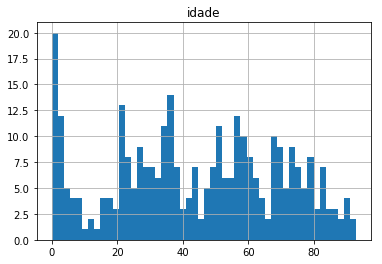

In [112]:
now = datetime.now()
data['idade'] = data['datanasc'].apply(lambda x: ((now - datetime.strptime(x, '%d/%m/%Y %H:%M') ).days / 365))

data_internamento = data[data['Internamento'] =='Sim']
data_internamento.hist(column="idade",bins=50)

dados_model_temp1 = data.drop('Internamento', axis = 1)
dados_model = dados_model_temp1.drop('datanasc', axis = 1)




### Normalizando atributos numéricos


In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
campos_numericos = ['Comodos', 'idade']

dados_model[campos_numericos] = scaler.fit_transform(dados_model[campos_numericos])


### Implementação: Pré-processamento dos dados



In [114]:
dados_model_final = pd.get_dummies(dados_model)
dados_model_final

encoded = list(dados_model_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

print encoded

286 total features after one-hot encoding.
['Comodos', 'idade', 'Sexo_F', 'Sexo_M', 'ciddesc_ABDOME AGUDO', 'ciddesc_ABORTAMENTO HABITUAL', 'ciddesc_ABSCESSO DA GLANDULA DE BARTHOLIN', 'ciddesc_ABSCESSO PERIAMIGDALIANO', 'ciddesc_ABUSO SEXUAL', 'ciddesc_ACIDENTE VASCULAR CEREBRAL, NAO ESPECIFICADO COMO HEMORRAGICO OU ISQUEMICO', 'ciddesc_AGRESSAO POR MEIO DE FORCA CORPORAL - RESIDENCIA', 'ciddesc_ALERGIA NAO ESPECIFICADA', 'ciddesc_AMEACA DE ABORTO', 'ciddesc_AMIGDALITE AGUDA NAO ESPECIFICADA', 'ciddesc_AMIGDALITE ESTREPTOCOCICA', 'ciddesc_AMPUTACAO TRAUMATICA DE UM OUTRO DEDO APENAS (COMPLETA) (PARCIAL)', 'ciddesc_ANEMIA EM OUTRAS DOENCAS CLASSIFICADAS EM OUTRA PARTE', 'ciddesc_ANEMIA FALCIFORME SEM CRISE', 'ciddesc_ANEMIA NAO ESPECIFICADA', 'ciddesc_ANGINA PECTORIS, NAO ESPECIFICADA', 'ciddesc_APENDICITE AGUDA SEM OUTRA ESPECIFICACAO', 'ciddesc_ARTRITE NAO ESPECIFICADA', 'ciddesc_ASMA MISTA', 'ciddesc_ASMA NAO ESPECIFICADA', 'ciddesc_ASMA PREDOMINANTEMENTE ALERGICA', 'ciddesc_ATEROSC

### Embaralhar e dividir os dados


In [115]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dados_model_final, 
                                                    internamento_model, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Conjunto de Treino: {}".format(X_train.shape[0])
print "Conjunto de Teste: {}".format(X_test.shape[0])

Conjunto de Treino: 531
Conjunto de Teste: 133


In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#X - Preditor
#y - classe
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, X_prod, y_prod): 

    
    results = {}
    
    start = time() 
    learner = learner.fit(X_train[:int(sample_size)], y_train[:int(sample_size)])
    end = time() 
    
    results['train_time'] = end - start
        
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() 
    
    results['pred_time'] = end - start
    
    report = classification_report(y_test, predictions_test)
    print('-----------------------------')
    print('report')
    print(report)
    print('-----------------------------')
    
    from sklearn.metrics import accuracy_score
            
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    ac_teste = accuracy_score(y_test, predictions_test)
    
    matrix = confusion_matrix(y_test, predictions_test)

    # Imprimindo a Confusion Matrix
    print('matrix confusao teste:')
    print(matrix)
    print(' ')
    
    
    results['acc_test'] =  ac_teste
    
    
    from sklearn.metrics import fbeta_score
    
    results['f_train'] =  fbeta_score(predictions_train, y_train, beta=2)
        
    fbs_teste =  fbeta_score(predictions_test, y_test, beta=2)
    results['f_test'] = fbs_teste
       
    # Success
    print("{} registros treinados = {}".format(learner.__class__.__name__, sample_size))
    print("{} acuracia teste= {}".format(learner.__class__.__name__,ac_teste))
    print("{} f-score(2) teste= {}".format(learner.__class__.__name__,fbs_teste))
        
    # Return the results
    return results

----
## Avaliando a performance do modelo

Como não temos um modelo real utilizarei o modelo DummyClassifier do sklearn como modelo de referência para verificarmos e compararmos se o modelo escolhido realmente apresenta uma performance melhor que uma metologia aleatória.
DummyClassifier é um classificador que faz previsões usando regras simples.  Esse classificador é útil como uma linha de base simples para comparar com outros classificadores (reais). Não deve ser usado para problemas reais conforme indicado na documentação do método: http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html.



In [117]:
from time import time
from sklearn.dummy import DummyClassifier



clf_A = DummyClassifier(strategy='constant',random_state=999,constant=1) 

samples = len(y_train)

results = {}

clf_name = clf_A.__class__.__name__
results[clf_name] = {}

train_predict(clf_A, samples, X_train, y_train, X_test, y_test, dados_model_final,internamento_model)
        


-----------------------------
report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        69
          1       0.48      1.00      0.65        64

avg / total       0.23      0.48      0.31       133

-----------------------------
matrix confusao teste:
[[ 0 69]
 [ 0 64]]
 
DummyClassifier registros treinados = 531
DummyClassifier acuracia teste= 0.481203007519
DummyClassifier f-score(2) teste= 0.536912751678


{'acc_test': 0.48120300751879697,
 'acc_train': 0.47645951035781542,
 'f_test': 0.53691275167785235,
 'f_train': 0.5321834244846444,
 'pred_time': 0.0,
 'train_time': 0.0}

In [118]:
from time import time
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier



clf_RandomForest = RandomForestClassifier(random_state=999)


registros = len(y_train)

# Colete os resultados dos algoritmos de aprendizado
results = {}
clf_name = clf_RandomForest.__class__.__name__
results[clf_name] = {}
train_predict(clf_RandomForest, registros, X_train, y_train, X_test, y_test, dados_model_final,internamento_model)
        


-----------------------------
report
             precision    recall  f1-score   support

          0       0.88      0.81      0.84        69
          1       0.81      0.88      0.84        64

avg / total       0.84      0.84      0.84       133

-----------------------------
matrix confusao teste:
[[56 13]
 [ 8 56]]
 
RandomForestClassifier registros treinados = 531
RandomForestClassifier acuracia teste= 0.842105263158
RandomForestClassifier f-score(2) teste= 0.823529411765


{'acc_test': 0.84210526315789469,
 'acc_train': 0.9792843691148776,
 'f_test': 0.82352941176470595,
 'f_train': 0.98860862489829149,
 'pred_time': 0.016000032424926758,
 'train_time': 0.06200003623962402}

## Avaliando a importância dos atributos

In [119]:
def define_nome_coluna(col):
    if col == 'solex_Sim':
        return 'Com Solicitacao Exame'
    elif col == 'solex_Nao':
        return 'Sem Solicitacao Exame'
    elif col == 'encesp_Nao':
        return 'Nao Encaminhado Especialista'
    elif col == 'encesp_Nao':
        return 'Nao Encaminhado Especialista'
    elif col == 'encesp_Sim':
        return 'Encaminhado Especialista'
    elif col == 'tratdom_FILTRACAO':
        return 'Tratamento Agua Filtracao'
    elif col == 'tratdom_CLORACAO':
        return 'Tratamento Agua Cloracao'
    return  col.replace("ciddesc_", "Diagnostico ")  

importances = pd.DataFrame({'feature':X_train.columns,'importancia':np.round(clf_RandomForest.feature_importances_,3)})
importances = importances.sort_values('importancia',ascending=False).set_index('feature')
#importances['feature'] = importances['feature'].map(define_nome_coluna)
importances = importances.rename(lambda x: define_nome_coluna(x))
importances.head(15)

,importancia
feature,
Com Solicitacao Exame,0.195
Sem Solicitacao Exame,0.119
idade,0.081
Comodos,0.056
Nao Encaminhado Especialista,0.038
Diagnostico EXAME MEDICO GERAL,0.031
Encaminhado Especialista,0.024
Diagnostico TRANST. MENTAIS/COMPORT. DEV. USO MULT. DROGAS/OUT. PSICOATIVAS - SINDROME DE DEPENDENCIA,0.018
Diagnostico OUTRAS DORES ABDOMINAIS E AS NAO ESPECIFICADAS,0.017


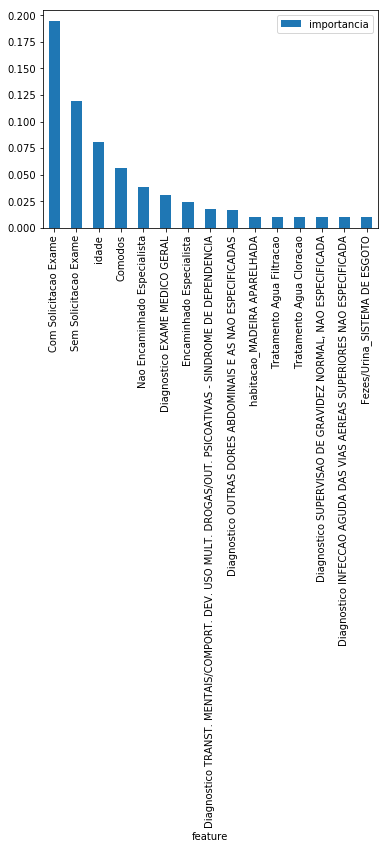

In [120]:
importancesf = pd.DataFrame(importances[:15])
importancesf.plot.bar()

----
## Melhorando os resultados


### Implementação: Tuning do modelo


In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer

clf_comum = RandomForestClassifier(random_state=999)


parameters = {"criterion": ['gini','entropy'],
              "max_features":[5,10,15,20,'auto'],
              "max_depth":[1, 2, 3, 10],
              "n_estimators" : [1,2, 3, 10, 15,20],
              "bootstrap" : [True,False],
              "random_state" : [999]}


scorer = make_scorer(fbeta_score, beta=2)

grid_obj = GridSearchCV(clf_comum,param_grid=parameters,scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

clf_otimizado = grid_fit.best_estimator_

print "Melhor estimador:\n------"
print(clf_otimizado)

predicao_comum = (clf_comum.fit(X_train, y_train)).predict(X_test)
predicao_otimizada = clf_otimizado.predict(X_test)

# Reportar os scores de antes e de depois
print "Modelo não otimizado\n------"
print "Acuracia dos dados de teste: {:.4f}".format(accuracy_score(y_test, predicao_comum))
print "F-score dos dados de teste: {:.4f}".format(fbeta_score(y_test, predicao_comum, beta = 2))
print "\nModelo Otimizado\n------"
print "Acuracia dos dados de teste: {:.4f}".format(accuracy_score(y_test, predicao_otimizada))
print "F-score dos dados de teste: {:.4f}".format(fbeta_score(y_test, predicao_otimizada, beta = 2))


Melhor estimador:
------
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=3, max_features=20, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=999,
            verbose=0, warm_start=False)
Modelo não otimizado
------
Acuracia dos dados de teste: 0.8421
F-score dos dados de teste: 0.8615

Modelo Otimizado
------
Acuracia dos dados de teste: 0.8571
F-score dos dados de teste: 0.8869
